# The Strategy Pattern

### Problem

While developing software apps, you may have a `few alternatives to accomplish something` in your code. 

Depending on your client choices, data sources, or other factors, `you want to do something different without changing the code`. 

For example, you need to develop a Payment module. The algorithm used as a core in this module depens on the Type Of Payment:
* Credit Card Payment
* PayPal Payment
* Bank Transfer Payment

And, as time passes, the owner of the App demands for including some other types of payment also for the customers. 


You often tend to *define algorithms using conditional statements for different situations* in the main class of the code. 

But it is not an elegant way of writing better code. 

It makes the main class of your code quite long, and it becomes too hard to maintain the application.

### Solution

The **Strategy** Design Pattern allows to `encapsulate interchangeable behaviors and algorithms in separate classes`. 

This pattern promotes code reusability, maintainability, and extensibility by enabling the **dynamic selection of algorithms at runtime**.

It defines a `family of algorithms` (***strategies***) and encapsulates each one `in its own class`. 

The Strategy Pattern allows these algorithms to be interchangeable, providing a way for clients to select different strategies at runtime without altering their code.

**Key Components**:
* `Context`: The context class maintains a reference to the selected strategy. It allows clients to switch between different strategies by setting the appropriate strategy.
* `Strategy`: The Strategy interface (or abstract class) declares a method or set of methods that define the algorithm to be used.
* `Concrete Strategies`: The concrete strategy classes implement the Strategy interface and provide specific implementations of the algorithms.

### UML Class Diagram

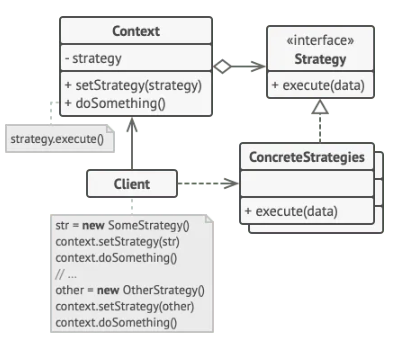

### When to Use

* *Dynamic Algorithm Switching*: We Need multiple variations of an algorithm within an object with the ability to switch during runtime.
* *Behavioral Differences in Similar Classes*: Dealing with numerous classes that share similarities but differ in behavior execution.
* *Business Logic Isolation*: Separating business logic from algorithm implementation details.
* *Simplify Massive Conditional Statements*: Your class has an extensive conditional statement handling different algorithm variants.

### Example 1 - an abstract implementation 

In [2]:
from abc import ABC, abstractmethod

# Step 1: Create the Strategy Interface
class IStrategy(ABC):
    @abstractmethod
    def execute_strategy(self):
        pass

In [3]:
# Step 2: Create Concrete Strategies
class ConcreteStrategyA(IStrategy):
    def execute_strategy(self):
        return "Executing Strategy A"

class ConcreteStrategyB(IStrategy):
    def execute_strategy(self):
        return "Executing Strategy B"

In [5]:
# Step 3: Create the Context
class Context:
    def __init__(self, strategy=None):
        # Context maintains a reference to one of the concrete strategies
        self.__strategy = strategy

    def set_strategy(self, strategy):
        # Exposes a setter to replace the strategy 
        # associated with the context at runtime
        self.__strategy = strategy

    def execute_strategy(self):
        # Context calls the execution method on the linked strategy object
        return self.__strategy.execute_strategy()

In [7]:
# Client Code to Showcase Usage

# Create concrete strategy objects
# Create concrete strategy objects
option1 = ConcreteStrategyA()
option2 = ConcreteStrategyB()

# Create context with a default strategy
myApp = Context(option1)

# Execute the default strategy
print(myApp.execute_strategy())  

# Switch to a different strategy at runtime
myApp.set_strategy(option2)
print(myApp.execute_strategy())  


Executing Strategy A
Executing Strategy B


In [8]:
myApp1 = Context()
myApp1.set_strategy(option2)
print(myApp1.execute_strategy())  

Executing Strategy B


### Example 2 - a Payment Module

In [3]:
from abc import ABC, abstractmethod

class IPaymentStrategy(ABC):
    @abstractmethod
    def pay(self, amount):
        pass

In [5]:
class CreditCardPayment(IPaymentStrategy):
    def __init__(self, CardNumber) -> None:
        self.__CardNumber=CardNumber
        self.__CardHolderName="Hanna"
        self.__ExpiryDate="01/01/2028"
        self.__SecurityCode="123"
    
    def pay(self, amount):
        SecurityCode=input("Enter CVV:")
        if SecurityCode==self.__SecurityCode:
            print(f"Paid {amount} using Credit Card {self.__CardNumber} by {self.__CardHolderName}.")

In [6]:
class PayPalPayment(IPaymentStrategy):
    def __init__(self, userName) -> None:
        self.__PayPalUserName=userName
        self.__email="Hanna@gmail.com"
        self.__pswd="12345"
    
    def pay(self, amount):
        pswd=input("Enter Password for the PayPal account {self.__PayPalUserName}:")
        if pswd==self.__pswd:
            print(f"{amount} is being paid using PayPal by {self.__PayPalUserName}.")
            print(f"To confirm and comlete this payment check {self.__email}.")

In [9]:
class PaymentContext:
    def __init__(self, payment_strategy=None):
        self.__payment_strategy = payment_strategy

    def set_payment_strategy(self, payment_strategy):
        if isinstance(payment_strategy, IPaymentStrategy):
            self.__payment_strategy = payment_strategy
    
    def make_payment(self, amount):
        self.__payment_strategy.pay(amount)

In [10]:
Hanna_credit_card = CreditCardPayment("0000111122223333")
HannaTransfer=PaymentContext(Hanna_credit_card)
HannaTransfer.make_payment(100)


Paid 100 using Credit Card 0000111122223333 by Hanna.


In [11]:
Hanna_paypal = PayPalPayment("HannaPayPal")
HannaTransfer.set_payment_strategy(Hanna_paypal)
HannaTransfer.make_payment(500)




500 is being paid using PayPal by HannaPayPal.
To confirm and comlete this payment check Hanna@gmail.com.
